In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load Dataset
data = pd.read_csv("/Users/dhruvpai/Downloads/practicals/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Step 3: Explore the Dataset
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Step 3: Handle Missing Values
# Drop rows where 'TotalCharges' is missing and ensure numeric conversion
data = data.dropna(subset=['TotalCharges'])
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:
# Fill remaining missing values only in numeric columns with column means
numeric_cols = data.select_dtypes(include=[np.number]).columns
data.loc[:, numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [10]:
# Step 4: Remove Duplicates
data = data.drop_duplicates()

In [11]:
# Step 5: Standardize Categorical Data
data['gender'] = data['gender'].str.strip().str.capitalize()
data['PaymentMethod'] = data['PaymentMethod'].str.replace("-", " ").str.title()

In [12]:
# Step 6: Convert Data Types
data['SeniorCitizen'] = data['SeniorCitizen'].astype(bool)
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [13]:
# Step 7: Handle Outliers using IQR for MonthlyCharges
Q1 = data['MonthlyCharges'].quantile(0.25)
Q3 = data['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['MonthlyCharges'] >= (Q1 - 1.5 * IQR)) & (data['MonthlyCharges'] <= (Q3 + 1.5 * IQR))]


In [14]:
# Step 8: Feature Engineering - Adding new feature 'TotalChargesPerMonth'
data['TotalChargesPerMonth'] = data['TotalCharges'] / (data['tenure'] + 1)


In [15]:
# Step 9: Scale Numerical Features
scaler = StandardScaler()
data[['MonthlyCharges', 'TotalCharges', 'tenure']] = scaler.fit_transform(data[['MonthlyCharges', 'TotalCharges', 'tenure']])


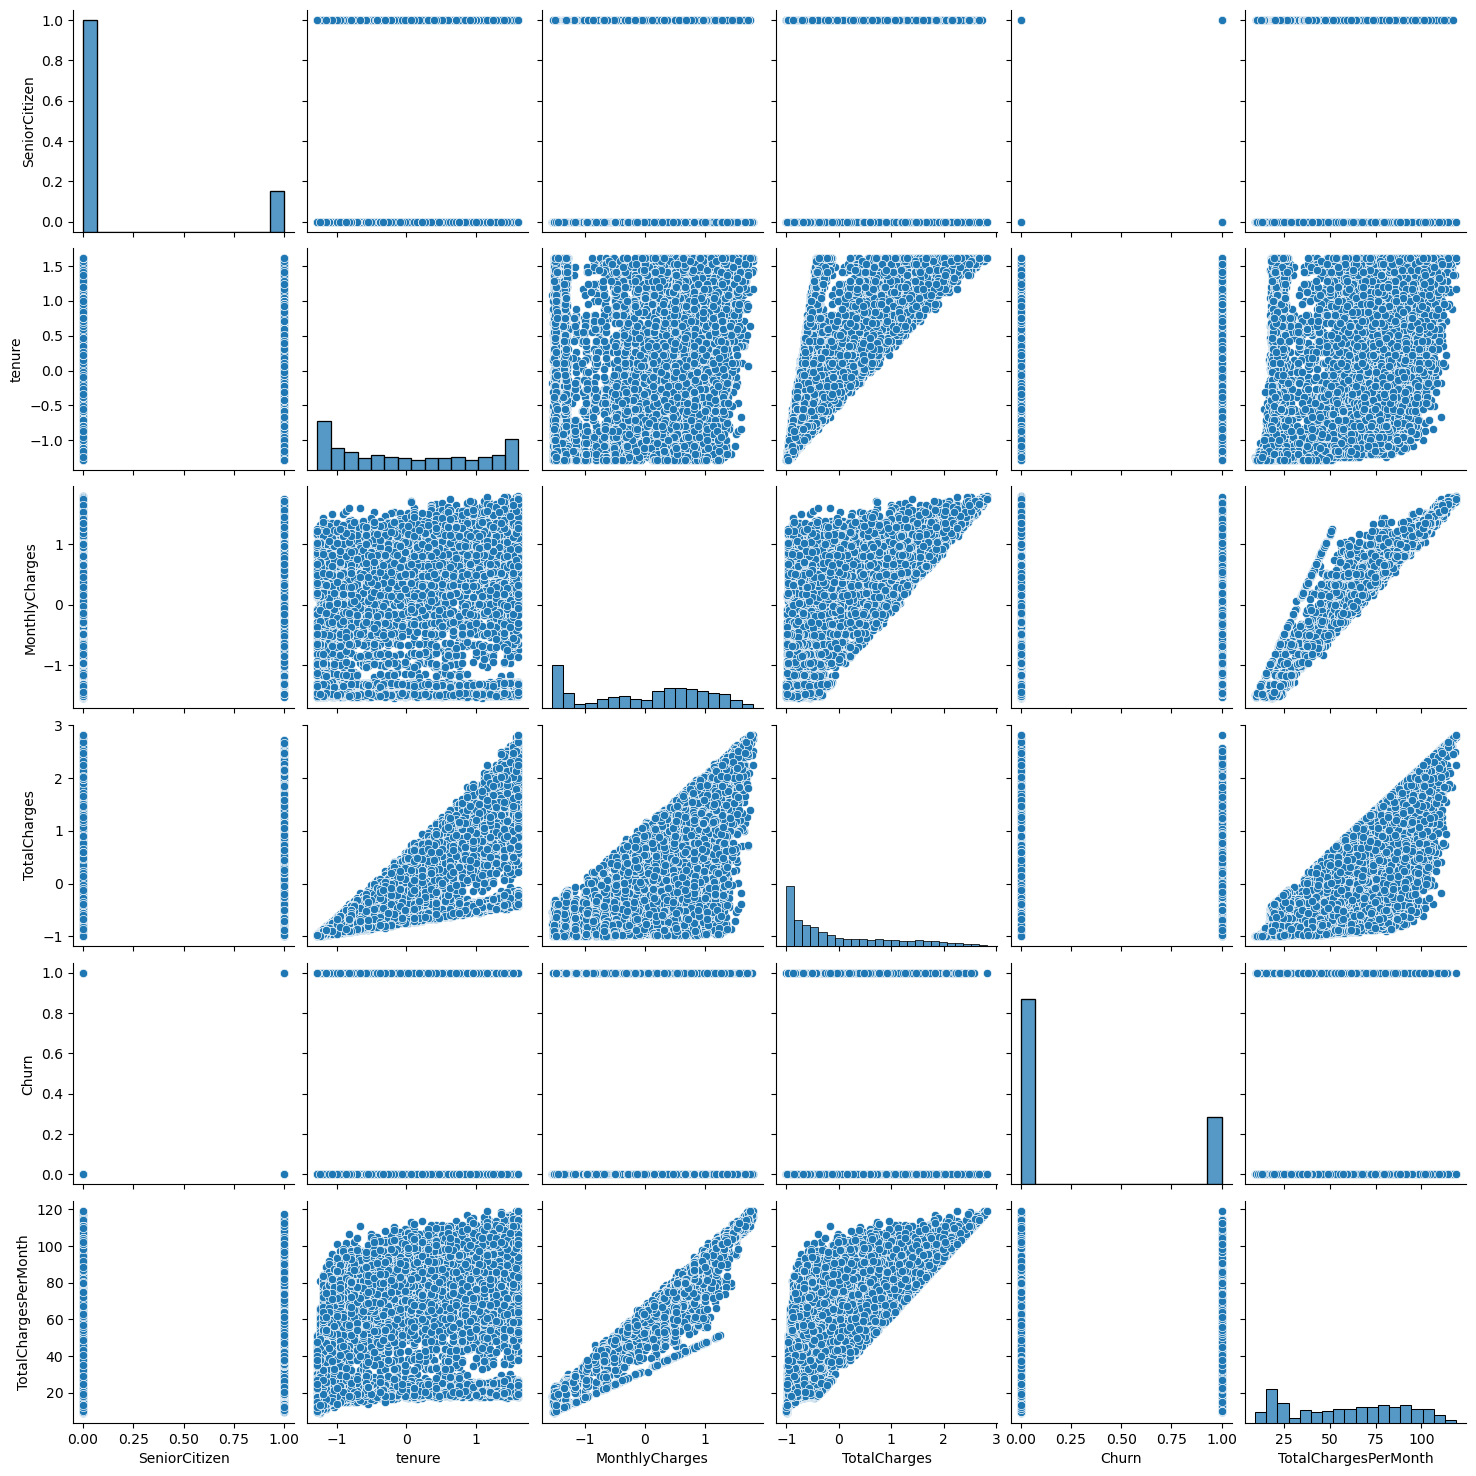

In [25]:
sns.pairplot(data)

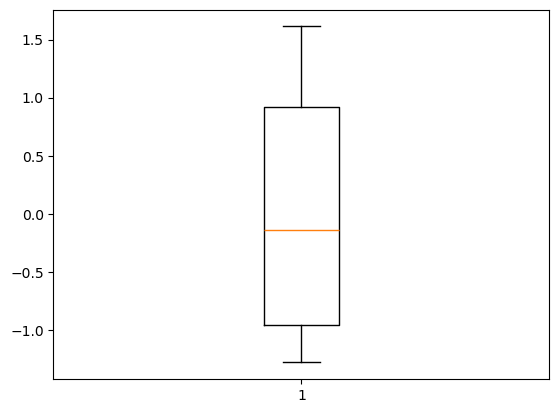

In [26]:
plt.boxplot(data['tenure'])
plt.show()

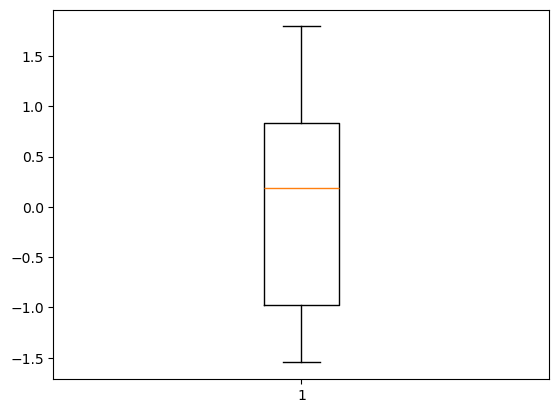

In [27]:
plt.boxplot(data['MonthlyCharges']) 
plt.show()

In [16]:
# Step 10: Split Data into Train and Test Sets
X = data.drop(columns=['Churn'])
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Step 11: Export Cleaned Data
data.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)

Explanation:
Task 1: We start by importing the necessary libraries and loading the dataset using Pandas.
pd.read_csv loads the dataset into a DataFrame, which makes it easier to explore and manipulate.


Task 2: Exploring the dataset gives an overview of data types, column names, and initial statistics.
data.info() shows column data types and missing values.
data.describe() provides summary statistics, allowing us to identify potential outliers or errors in numeric columns.

Task 3:
Missing values in the TotalCharges column are handled by converting them to numeric, then filling remaining nulls with column means.
.loc Indexing: Using .loc[:, numeric_cols] explicitly assigns values to all rows in the specified numeric columns, ensuring that Pandas directly modifies the DataFrame and removes ambiguity in indexing.

Task 4:
drop_duplicates() removes duplicate rows, ensuring unique records for accurate analysis.

Task 5:
Inconsistent formats in columns like gender and PaymentMethod are standardized, improving readability and consistency.

Task 6:
Converting columns to appropriate data types can improve performance and make the data easier to interpret.

Task 7:
Outliers are handled in the MonthlyCharges column using the IQR method, which helps reduce the impact of extreme values.

Task 8:
We create a new feature, TotalChargesPerMonth, which could provide insight into average spending per month and its relationship to churn.

Task 9:
Scaling numeric columns ensures that features are on a similar scale, helping models perform better.

Task 10
Then we use seaborn and matplotlib for visualisation
we make two boxplots for 'tenure' and 'monthlycharges'

Task 11:
We split the dataset into training and testing sets, enabling model validation.

Task 12:
The cleaned dataset is saved for future use, ensuring consistency in subsequent analyses.
